In [6]:
import pandas as pd

df=pd.read_csv("churn_modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

x=df.drop(columns=['Exited'])
y=df['Exited'] 

x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [23]:
# Define a function to create model
from tensorflow.keras import regularizers

def create_model(hidden_layers, units, activation='relu', reg=None, input_dim=None):
    model = tf.keras.Sequential()
    for i in range(hidden_layers):
        kernel_reg = None
        if reg == 'l1':
            kernel_reg = regularizers.l1(0.001)
        elif reg == 'l2':
            kernel_reg = regularizers.l2(0.001)

        if i == 0:
            model.add(tf.keras.layers.Dense(units[i], activation=activation,
                                            kernel_regularizer=kernel_reg, input_shape=(input_dim,)))
        else:
            model.add(tf.keras.layers.Dense(units[i], activation=activation, kernel_regularizer=kernel_reg))
    # Output layer (binary classification)
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return model
def train_evaluate(hidden_layers, units, epochs, activation, reg, lr):
    print(f"\nExperiment: HL={hidden_layers}, Units={units}, Epochs={epochs}, Activation={activation}, Reg={reg}, LR={lr}")

    model = create_model(hidden_layers, units, activation, reg, input_dim=x_train.shape[1])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=32,
        verbose=0
    )

    # Plot loss curves
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss Curves - HL={hidden_layers}, Epochs={epochs}, Act={activation}, Reg={reg}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Predictions and Metrics on test set
    y_pred_prob = model.predict(x_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(f"Test Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")

    return {
        'Hidden Layers': hidden_layers,
        'Units': units,
        'Epochs': epochs,
        'Activation': activation,
        'Regularization': reg,
        'Learning Rate': lr,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    }


Experiment: HL=1, Units=[128], Epochs=20, Activation=relu, Reg=None, LR=0.01


c:\venvs\personal-env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


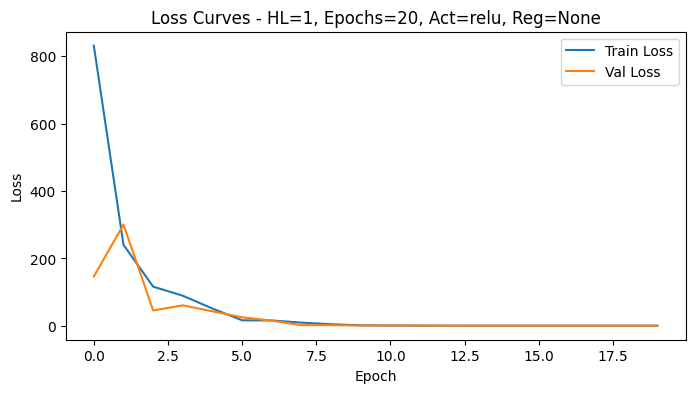

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


NameError: name 'accuracy_score' is not defined

In [24]:
import matplotlib.pyplot as plt
results = []

# Experiment i: 1 hidden layer, 128 units, 20 epochs, ReLU, no regularization, lr=0.01
results.append(train_evaluate(hidden_layers=1, units=[128], epochs=20, activation='relu', reg=None, lr=0.01))


import pprint
pprint.pprint(results)